In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Iris dataset 

In [22]:
file= '/Users/farhad/Desktop/Frauser /Datasets/Iris.csv'

In [23]:
idata= pd.read_csv(file)

# Data cleaning

In [24]:
idata.shape

(150, 6)

In [25]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
idata.describe()
idata.isnull().sum()
idata



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
idata['Species']=idata['Species'].str.replace('Iris-', '')
idata.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [35]:
#idata.drop('Id', axis= 1, inplace= True)
idata.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [40]:
idata.rename(columns= {'SepalLengthCm': 'sepallength', 'SepalWidthCm': 'sepalwidth', 'PetalLengthCm': 'petallength', 'PetalWidthCm': 'petalwidth',
       'Species':'species'}, inplace= True)

In [46]:
# checking missing values
idata.isnull().sum()
idata.isna().sum()



sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
species        0
dtype: int64

In [ ]:
idata['species'].value_counts()
# They have thirty species available in this dataset

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [55]:
# finding the mean median and quartile of this dataset 
stats= idata.describe()
stats.rename({'50%': 'median'}, inplace= True)
stats.loc['range']= stats.loc['max']-stats.loc['min']
stats

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
median,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [ ]:
# separetely mean calculation 
idata.groupby('species').mean() # mean calculation using groupby features
idata.groupby('species').median() # calculation of median using group by features 


,sepallength,sepalwidth,petallength,petalwidth
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


# scatterplot creation using matplotlib inline 
%matplotlib inline is a special comand uslis of it have to type plt.show()

[Text(0.5, 0, 'Sepal length'),
 Text(0, 0.5, 'Sepal width'),
 Text(0.5, 1.0, 'Sepal length vs width')]

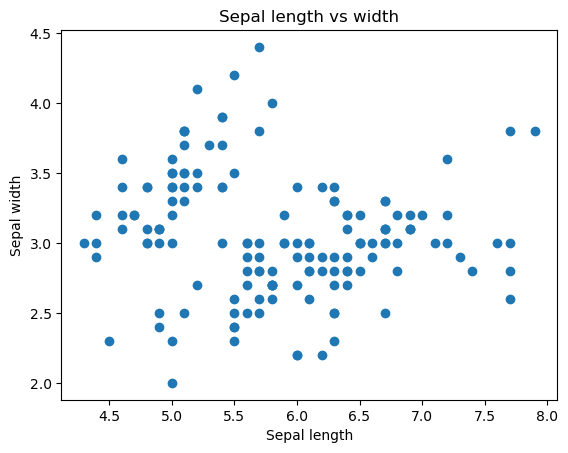

In [64]:
# a simple scatter plot using matplotlib 
ax= plt.axes()
ax.scatter(idata.sepallength, idata.sepalwidth)

#Label axes
ax.set(xlabel= 'Sepal length', ylabel= 'Sepal width', title= 'Sepal length vs width')

[Text(0.5, 0, 'sepallength'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'speal')]

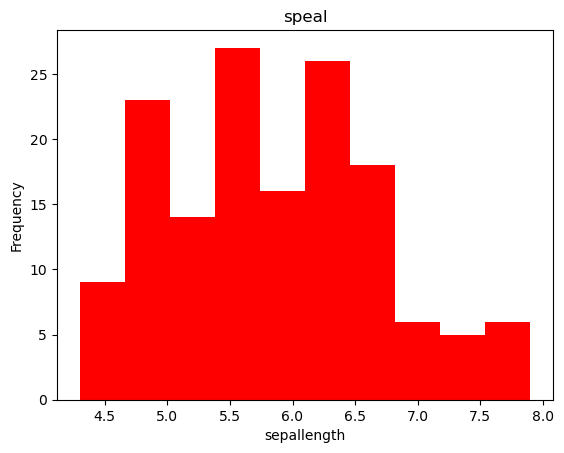

In [ ]:
#Histograme base on features 

ax= plt.axes()
ax.hist(idata.sepallength, color= 'red')
ax.set(xlabel= 'sepallength', ylabel= 'Frequency', title= 'speal')



# This is not directly from matplotlib, but from Pandas, which uses Matplotlib under the hood.

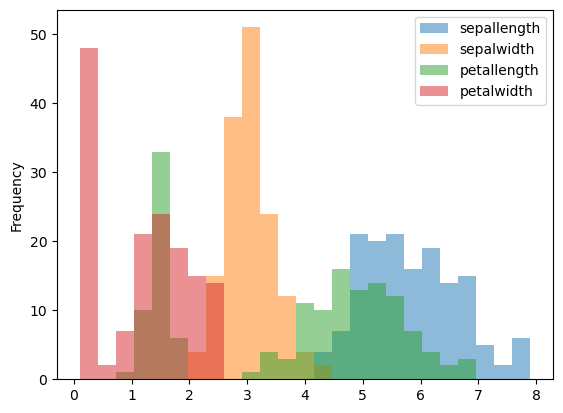

In [78]:
# plot hist megthod 
# single plot with histograme with each feature 
ax= idata.plot.hist(bins= 25, alpha= .5)

(2, 2)


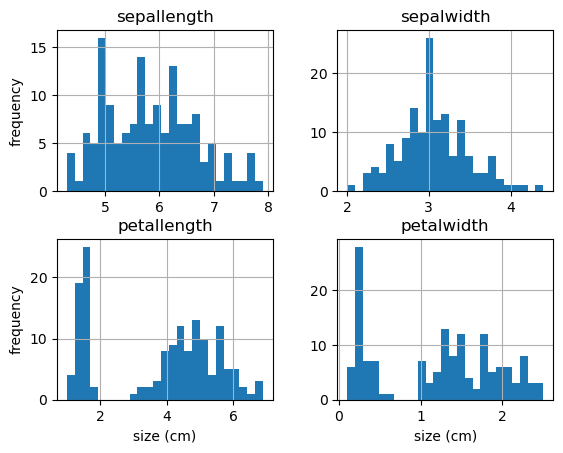

In [ ]:
# four separete histograme in a list 
axList= idata.hist(bins= 25)
# labels adding 

n_rows, n_cols = axList.shape

for i in range(n_rows):
    for j in range(n_cols):
        ax = axList[i, j]
        if i == n_rows - 1:  # Last row
            ax.set_xlabel('size (cm)')
        if j == 0:  # First column
            ax.set_ylabel('frequency')

+-------------+-------------+
| axList[0,0] | axList[0,1] |   ← Top row
+-------------+-------------+
| axList[1,0] | axList[1,1] |   ← Bottom row

array([[<Axes: title={'center': 'petallength'}, xlabel='[species]'>,
        <Axes: title={'center': 'petalwidth'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepallength'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepalwidth'}, xlabel='[species]'>]],
      dtype=object)

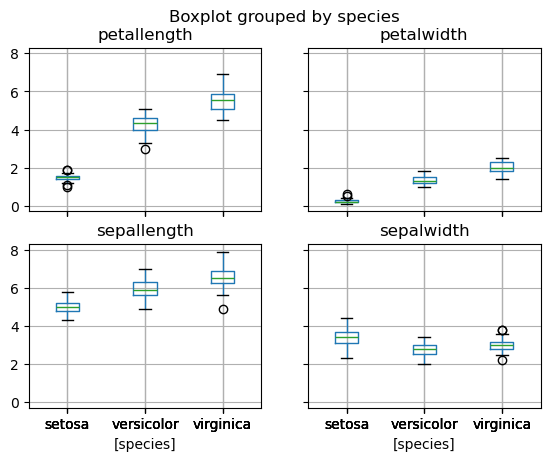

In [ ]:
idata.boxplot(by= 'species') # this is also from pandas 

<Axes: xlabel='Type', ylabel='Size'>

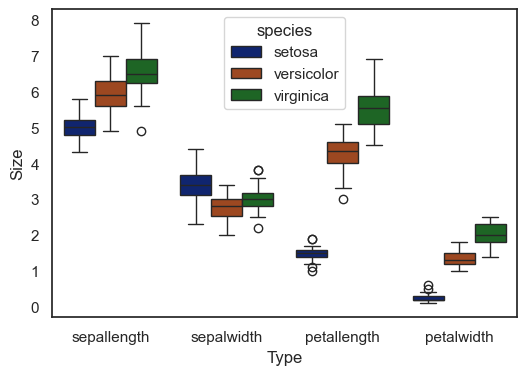

In [103]:
import seaborn as sns
idataset= pd.DataFrame(idata.set_index('species').stack().reset_index().rename(columns= {'level_1': 'Type', 0:'Size'}))
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

fig, ax = plt.subplots(figsize=(6, 4)) 
sns.boxplot(x= 'Type', y= 'Size', hue= 'species', data=idataset)